In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download("stopwords")
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import seaborn as sns
import tensorflow as tf
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
airline_tweets= pd.read_csv("Tweets.csv")

In [ ]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
confidence_threshold=0.6
tweets_df=pd.concat([airline_tweets['text'],airline_tweets['airline_sentiment']],axis=1)
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [ ]:
tweets_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_ordering=['negative','neutral','positive']

In [ ]:
tweets_df['airline_sentiment']=tweets_df['airline_sentiment'].apply(lambda x:sentiment_ordering.index(x))
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,2
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


In [ ]:
def process_tweet (tweet):
  new_tweet=tweet.lower()
  new_tweet=re.sub(r'@\w+',' ',new_tweet)
  new_tweet=re.sub(r'#',' ',new_tweet)
  new_tweet=re.sub(r'https\S+', ' ',new_tweet) 
  new_tweet=re.sub(r'\$\S+', 'dollar',new_tweet)
  new_tweet=re.sub(r'[^a-z0-9\s', ' ',new_tweet) 
  new_tweet=re.sub(r'[0-9]', 'number', new_tweet)
  new_tweet=new_tweet.split(" ") 
  new_tweet=list(map(lambda x:ps.stem(x), new_tweet)) 
  new_tweet=list(map(lambda x:ps.stem(x), new_tweet)) 
  if '' in new_tweet: 
    new_tweet.remove('')
  return new_tweet

In [ ]:
tweets=tweets_df['text']
labels=np.array(tweets_df['airline_sentiment'])
labels

array([1, 2, 1, ..., 1, 0, 1])

In [ ]:
vocabulary=set()
for tweet in tweets:
  for word in tweet:
    if word not in vocabulary:
      vocabulary.add(word)
vocab_length=len(vocabulary)
max_seq_length=0
for tweet in tweets:
  if len(tweet)>max_seq_length:
    max_seq_length=len(tweet)
print("Vocab Length : ",vocab_length)
print("Max Seq Length : ",max_seq_length)

Vocab Length :  237
Max Seq Length :  186


In [ ]:
tokenizer=Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)
sequences=tokenizer.texts_to_sequences(tweets)
word_index=tokenizer.word_index
model_input=pad_sequences(sequences,max_seq_length,padding='post')

In [ ]:
word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'united': 5,
 'you': 6,
 'for': 7,
 'flight': 8,
 'on': 9,
 'and': 10,
 'my': 11,
 'usairways': 12,
 'americanair': 13,
 'is': 14,
 'in': 15,
 'southwestair': 16,
 'jetblue': 17,
 'of': 18,
 'me': 19,
 'it': 20,
 'your': 21,
 'have': 22,
 'was': 23,
 'not': 24,
 'with': 25,
 'no': 26,
 'that': 27,
 'at': 28,
 'this': 29,
 'get': 30,
 'but': 31,
 't': 32,
 'co': 33,
 'be': 34,
 'from': 35,
 'http': 36,
 'can': 37,
 'are': 38,
 'thanks': 39,
 'cancelled': 40,
 'we': 41,
 'now': 42,
 'an': 43,
 'just': 44,
 'service': 45,
 'do': 46,
 'so': 47,
 '2': 48,
 'help': 49,
 'been': 50,
 'time': 51,
 'will': 52,
 'customer': 53,
 'up': 54,
 'out': 55,
 'our': 56,
 'they': 57,
 "i'm": 58,
 'amp': 59,
 'hours': 60,
 'us': 61,
 'what': 62,
 'when': 63,
 'flights': 64,
 'how': 65,
 'hold': 66,
 'plane': 67,
 'if': 68,
 'all': 69,
 'why': 70,
 'thank': 71,
 'still': 72,
 'there': 73,
 'one': 74,
 'please': 75,
 'need': 76,
 'would': 77,
 'delayed': 78,
 "can't":

### **Training Model**

In [ ]:
model_input.shape

(14640, 186)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(model_input,labels,train_size=0.7,random_state=22)

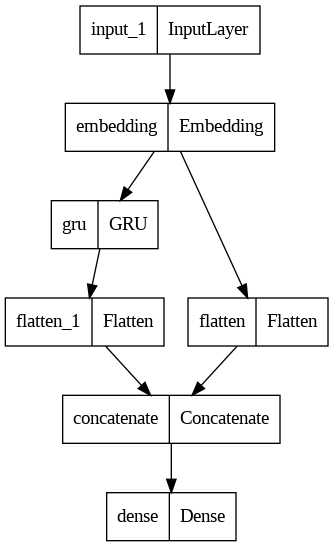

In [ ]:
embedding_dim=32
inputs=tf.keras.Input(shape=(max_seq_length,))
embedding=tf.keras.layers.Embedding(input_dim=vocab_length,output_dim=embedding_dim,input_length=max_seq_length)(inputs)

#Model A
flatten=tf.keras.layers.Flatten()(embedding)

#Model B

gru=tf.keras.layers.GRU(units=embedding_dim)(embedding) #gatted recurrent unit
gru_flatten=tf.keras.layers.Flatten()(gru)

#A and B in output
concat=tf.keras.layers.concatenate([flatten,gru_flatten])
outputs=tf.keras.layers.Dense(3,activation='softmax')(concat)
model=tf.keras.Model(inputs,outputs)
tf.keras.utils.plot_model(model)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size=22
epochs=100
history=model.fit(X_train,y_train,validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True,verbose=1), tf.keras.callbacks.ReduceLROnPlateau()])

257/257 [==============================] - 28s 99ms/step - loss: 0.7921 - accuracy: 0.6649 - val_loss: 0.6535 - val_accuracy: 0.7278 - lr: 0.0010


In [ ]:
model.evaluate(X_test,y_test)

138/138 [==============================] - 3s 21ms/step - loss: 0.6716 - accuracy: 0.7259


[0.6715881824493408, 0.7258651852607727]

<Axes: ylabel='airline'>

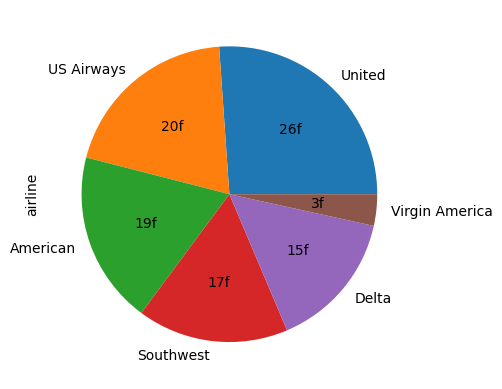

In [ ]:
airline_tweets.airline.value_counts().plot(kind='pie',autopct="%1.0ff")

<Axes: >

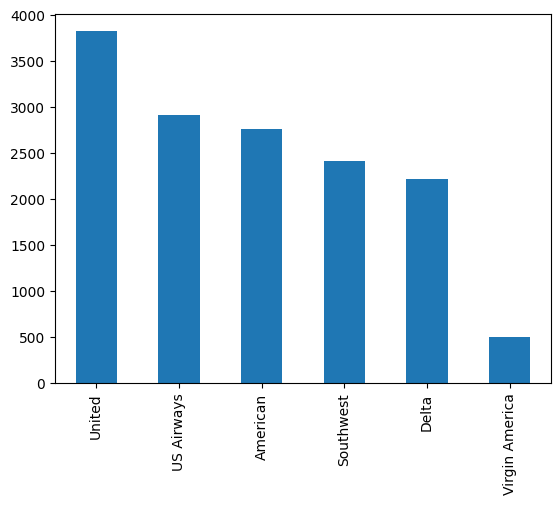

In [ ]:
airline_tweets.airline.value_counts().plot(kind='bar')

<Axes: ylabel='airline_sentiment'>

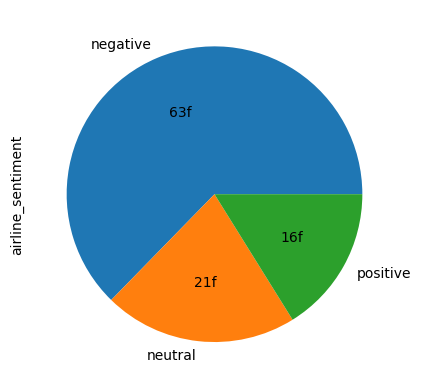

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie',autopct="%1.0ff")

<Axes: xlabel='airline'>

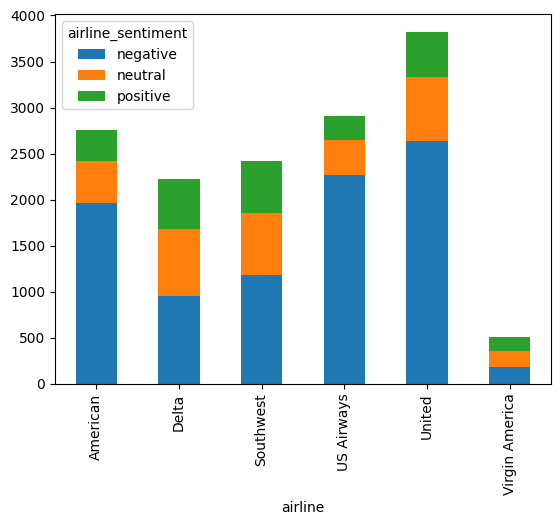

In [ ]:
airline_tweets.groupby(['airline','airline_sentiment']).size().unstack().plot(kind='bar',stacked=True)